In [1]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("updated_data.csv")
search_terms = ['Etophylline+Theophylline', 'Etophylline+Theophylline 100mg tab', 'Etophylline+Theophylline 150mg tab', 'Etophylline+Theophylline 300mg tab','Salbutamol','Salbutamol 2mg tab','Salbutamol 2mg/5ml syp','Salbutamol 4mg tab','Salbutamol inhaler','Salbutamol syp']

matches = df[df.isin(search_terms).any(axis=1)]
matches.head(100)

C:\Users\vidhi\AppData\Local\Temp\ipykernel_12948\3484344142.py:1: DtypeWarning: Columns (13,15,17,18,19,20,21,22,23,24,26,28,49,50,51,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("updated_data.csv")


,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,...,duration_11,drug_12,dosage_12,duration_12,drug_13,dosage_13,duration_13,drug_14,dosage_14,duration_14
42,2019-01-25,West,Nangloi,110723,Nirmal,1.367149e+09,12:00:22,0,53.0,['asthma'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2018-01-08,West,Vikas Puri,310708,S.K. Arora,1.008458e+09,12:39:41,0,18.0,['asthma'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2016-08-19,West,Nangloi,110705,Nirmal,1.232369e+09,10:07:06,1,52.0,['cough'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,2019-06-19,West,Shakurbasti,150706,Dr. Rakesh Khanna,1.123353e+09,11:28:30,0,50.0,"['asthma', 'bronchitis']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,2017-06-20,West,Vikas Puri,310710,Dr. Ravikant,1.171620e+09,12:08:51,0,12.0,['acute respiratory tract infection'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,2019-03-06,West,Vikas Puri,310724,Shailender,1.367199e+09,08:19:03,1,70.0,['acute upper respiratory infections'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4391,2018-12-15,West,Uttam Nagar,320721,NISHANT,1.366942e+09,09:32:23,0,5.0,"['cough', 'fever']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4460,2018-10-01,West,Uttam Nagar,320721,NISHANT,1.003466e+09,08:49:14,0,50.0,"['fever', 'cough']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4469,2018-12-17,West,Uttam Nagar,320721,NISHANT,1.366955e+09,13:35:16,0,39.0,"['urinary tract infection', 'cough']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(matches)

57304

C:\Users\vidhi\AppData\Local\Temp\ipykernel_12948\1028691718.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_year'] = df_filtered['date'].dt.to_period('M')


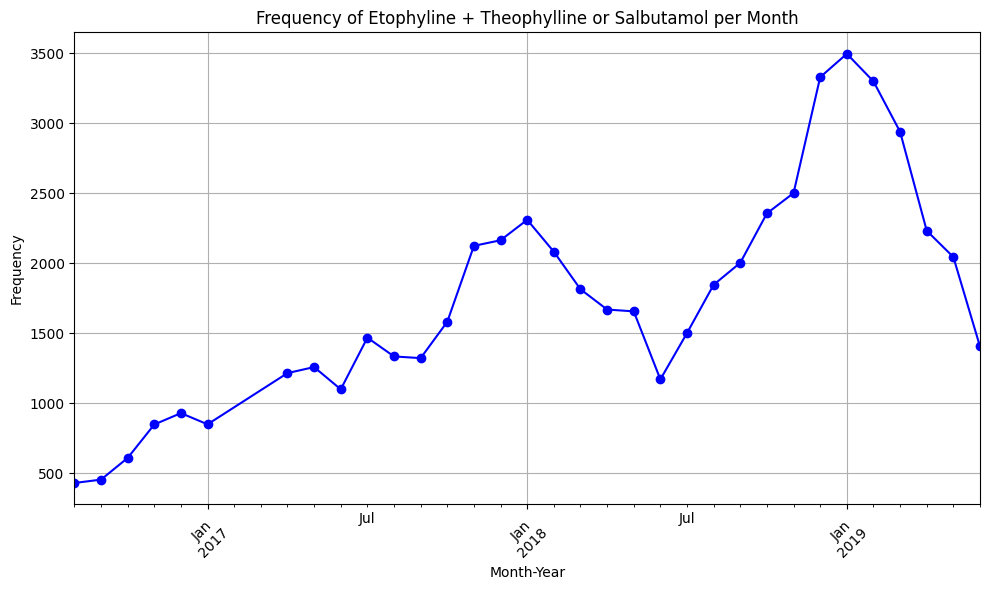

In [9]:
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

drugs_to_search = ['Etophylline+Theophylline','Etophylline+Theophylline 100mg tab', 'Etophylline+Theophylline 150mg tab', 'Etophylline+Theophylline 300mg tab','Salbutamol','Salbutamol 2mg tab','Salbutamol 2mg/5ml syp','Salbutamol 4mg tab','Salbutamol inhaler','Salbutamol syp']

def contains_drug(row, drugs):
    for col in ['drug_1', 'drug_2', 'drug_3', 'drug_4', 'drug_5', 'drug_6', 'drug_7', 
                'drug_8', 'drug_9', 'drug_10', 'drug_11', 'drug_12', 'drug_13', 'drug_14']:
        if any(drug in str(row[col]) for drug in drugs):
            return True
    return False

df['contains_drug'] = df.apply(contains_drug, axis=1, drugs=drugs_to_search)

df_filtered = df[df['contains_drug']]

df_filtered['month_year'] = df_filtered['date'].dt.to_period('M')

drug_counts = df_filtered.groupby('month_year').size()

plt.figure(figsize=(10, 6))
drug_counts.plot(kind='line', marker='o', color='b')
plt.title('Frequency of Etophyline + Theophylline or Salbutamol per Month')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [13]:

# Create a pivot table to count occurrences of each drug on each date
columns = ['drug_1', 'drug_2', 'drug_3', 'drug_4', 'drug_5', 'drug_6', 'drug_7', 'drug_8', 'drug_9','drug_10','drug_11','drug_12','drug_13','drug_14']
pivot_table = matches.pivot_table(index='date', columns=columns, aggfunc='size', fill_value=0)

# Display the pivot table
pivot_table.head()

date


In [22]:
df_cleaned = df[~df.apply(lambda row: row.astype(str).str.contains('##').any(), axis=1)]
df_melted = df_cleaned.melt(id_vars=['date'], value_vars=columns, var_name='Drug_Column', value_name='Drug')

# Create the pivot table
pivot_table = df_melted.pivot_table(index='date', columns='Drug', aggfunc='size', fill_value=0)

# Display the pivot table
print(pivot_table.head())

Drug        Acetyl Salicylic Acid  Acetyl Salicylic Acid 75 tab  Acyclovir  \
date                                                                         
2016-07-01                      0                             0          0   
2016-07-02                      0                             0          0   
2016-07-04                      0                             0          0   
2016-07-05                      0                             0          0   
2016-07-06                      0                             0          0   

Drug        Acyclovir 200mg tab  Acyclovir oint  Adrenaline Injection  \
date                                                                    
2016-07-01                    0               0                     0   
2016-07-02                    0               0                     0   
2016-07-04                    0               0                     0   
2016-07-05                    0               0                     0   
2016-07-06     

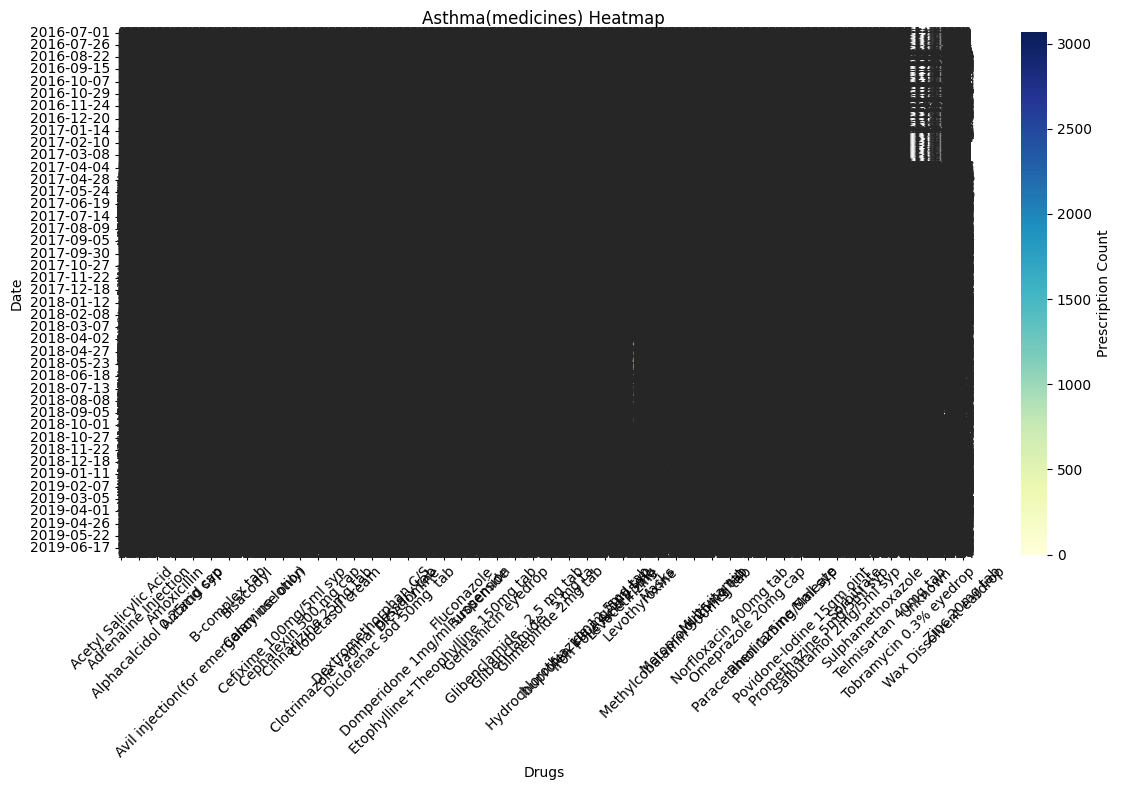

In [23]:
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Prescription Count'})
plt.title('Asthma(medicines) Heatmap')
plt.xlabel('Drugs')
plt.ylabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()

In [ ]:
df = pd.read_csv("updated-data.csv")

# Define age groups
bins = [0, 2, 6, 12, 18, 25, 44, 59, float('inf')]
labels = ['0-2', '3-6', '7-12', '13-18', '19-25', '26-44', '45-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# List of diabetic medicines
diabetic_medicines = ['Glibenclamide','Glibenclamide 2.5mg tab','Glibenclamide 5mg tab','Glimepiride','Glimepiride 1mg tab','Glimepiride 2mg tab','Glimepiride 4mg tab','Metformin','Metformin 500mg tab','Metformin 850mg tab']

# Filter rows where medicines are among the diabetic medicines
df_diabetic = df[df['Medicine'].isin(diabetic_medicines)]

# Group data by age group and medicine, and count patients
grouped_data = df_diabetic.groupby(['Age Group', 'Medicine']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Diabetic Patients by Medicine and Age Group", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Medicines", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\vidhi\AppData\Local\Temp\ipykernel_12948\2967438009.py:2: DtypeWarning: Columns (13,15,17,18,19,20,21,22,23,24,26,28,49,50,51,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("updated_data.csv")
C:\Users\vidhi\AppData\Local\Temp\ipykernel_12948\2967438009.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_diabetic.groupby(['Age Group', 'Medicine']).size().unstack(fill_value=0)


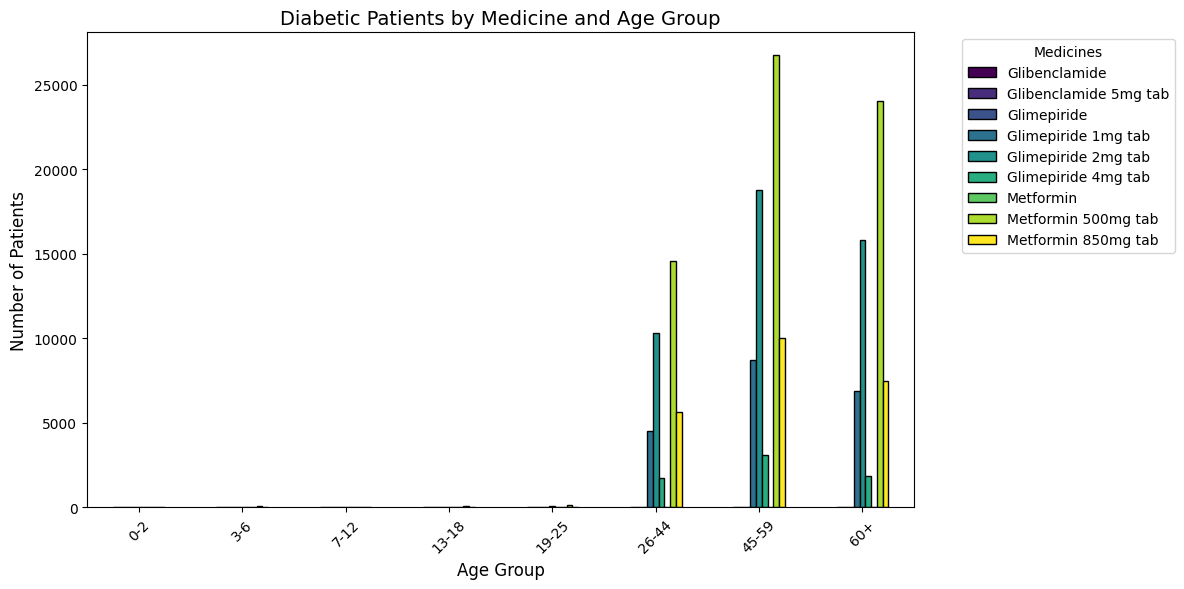

In [26]:

# Load the dataset
df = pd.read_csv("updated_data.csv")

# Define age groups
bins = [0, 2, 6, 12, 18, 25, 44, 59, float('inf')]
labels = ['0-2', '3-6', '7-12', '13-18', '19-25', '26-44', '45-59', '60+']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# List of diabetic medicines
diabetic_medicines = [
    'Glibenclamide','Glibenclamide 2.5mg tab','Glibenclamide 5mg tab',
    'Glimepiride','Glimepiride 1mg tab','Glimepiride 2mg tab','Glimepiride 4mg tab',
    'Metformin','Metformin 500mg tab','Metformin 850mg tab'
]

# Flatten the drug columns and create a 'Medicine' column
df_melted = df.melt(id_vars=['Age Group'], value_vars=[f'drug_{i}' for i in range(1, 15)], var_name='Drug Column', value_name='Medicine')

# Filter rows where medicine is in the diabetic list
df_diabetic = df_melted[df_melted['Medicine'].isin(diabetic_medicines)]

# Group data by Age Group and Medicine, count the number of patients
grouped_data = df_diabetic.groupby(['Age Group', 'Medicine']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Diabetic Patients by Medicine and Age Group", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Medicines", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


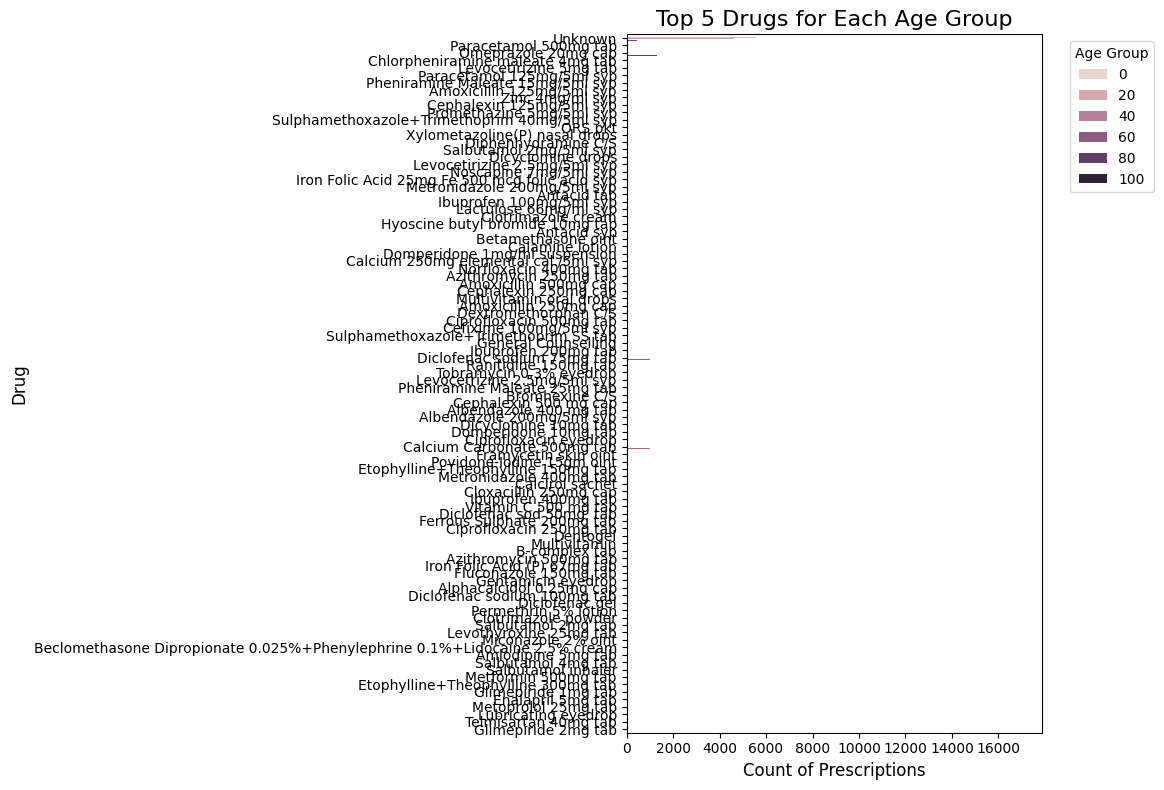

In [28]:
df_long = pd.melt(df, id_vars=['age'], value_vars=[f'drug_{i}' for i in range(1, 15)], 
                  var_name='Drug', value_name='Drug Name')

# Count occurrences of each drug by age group
drug_counts = df_long.groupby(['age', 'Drug Name']).size().reset_index(name='Count')

# Sort by age and count to get the top 5 drugs per age group
drug_counts = drug_counts.sort_values(by=['age', 'Count'], ascending=[True, False])

# Get top 5 drugs per age group
top_5_per_age = drug_counts.groupby('age').head(5)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Drug Name', hue='age', data=top_5_per_age, dodge=True)

# Set labels and title
plt.title('Top 5 Drugs for Each Age Group', fontsize=16)
plt.xlabel('Count of Prescriptions', fontsize=12)
plt.ylabel('Drug', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [2]:
df = pd.read_csv("updated_data.csv")
df_cleaned = df[~df['drug_1'].apply(lambda x: 'Unknown' in x)]

C:\Users\vidhi\AppData\Local\Temp\ipykernel_20692\1077831025.py:1: DtypeWarning: Columns (13,15,17,18,19,20,21,22,23,24,26,28,49,50,51,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("updated_data.csv")


C:\Users\vidhi\AppData\Local\Temp\ipykernel_20692\2666865516.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = df_cleaned['age'].apply(categorize_age)


         date district         city  facilityid      doctorname     medongoid  \
0  2017-06-10     West  Uttam Nagar      320721         NISHANT  1.162021e+09   
1  2018-04-26     West   Vikas Puri      310710    Dr. Ravikant  1.116585e+09   
2  2019-01-04     West   Vikas Puri      310710    Dr. Ravikant  1.367039e+09   
3  2018-12-03     West   Vikas Puri      310724      Shailender  1.120420e+09   
4  2019-06-29     West  Uttam Nagar      320712  Dr. R.C.Khanna  1.367939e+09   

  appointmenttime  gender   age                                 diagnosis  \
0        13:07:17       0  30.0                             ['body pain']   
1        12:26:25       1  31.0     ['acute respiratory tract infection']   
2        10:06:51       1  28.0                             ['influenza']   
3        08:47:58       1  35.0  ['dermatitis+eczema', 'gastroenteritis']   
4        11:41:40       1  42.0                             ['back pain']   

   ... drug_12 dosage_12 duration_12 drug_13 dosag

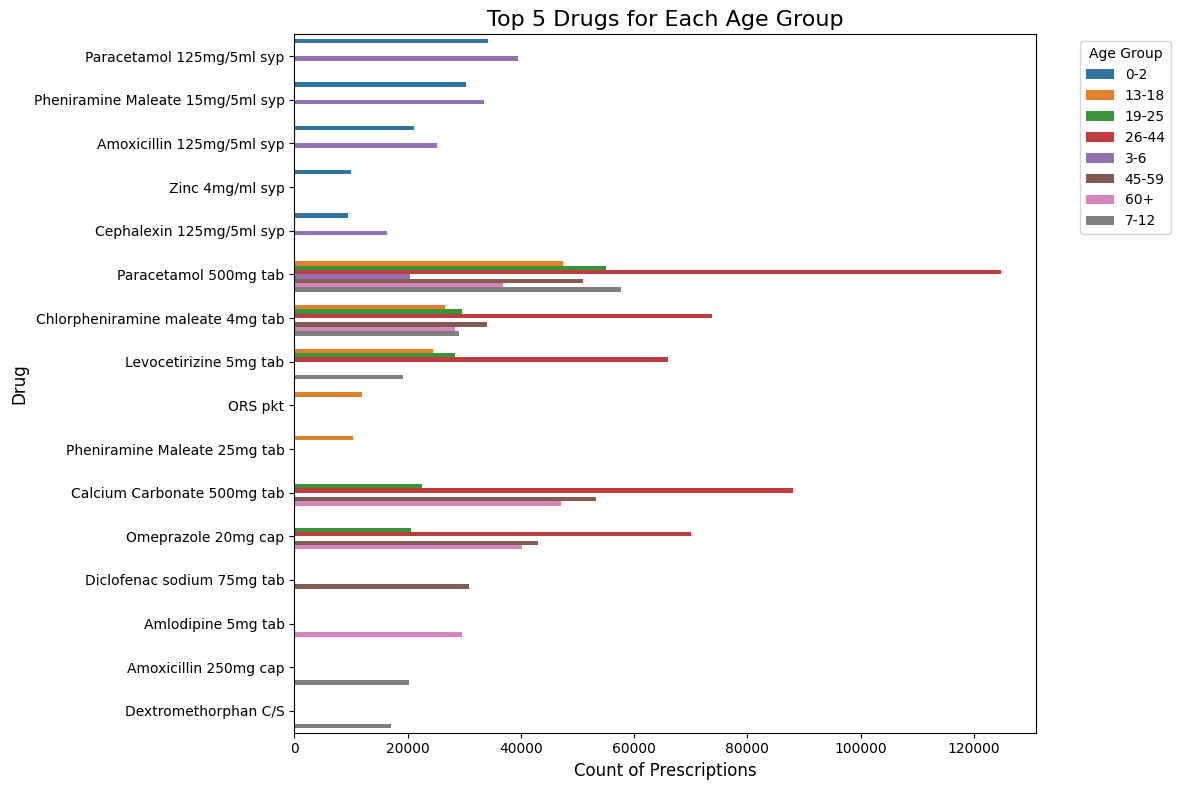

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def categorize_age(age):
    if age <= 2:
        return '0-2'
    elif age <= 6:
        return '3-6'
    elif age <= 12:
        return '7-12'
    elif age <= 18:
        return '13-18'
    elif age <= 25:
        return '19-25'
    elif age <= 44:
        return '26-44'
    elif age <= 59:
        return '45-59'
    else:
        return '60+'

# Assuming 'age' is in the form of integers; if it's a string, you may need to convert it
df_cleaned['age_group'] = df_cleaned['age'].apply(categorize_age)

# Preview the first few rows to ensure the new 'age_group' column is created (optional)
print(df_cleaned.head())

# Reshape the data from wide to long format
# Assuming that the 'age_group' column is now present and the drug columns are named 'drug_1', 'drug_2', ..., 'drug_250'
df_long = pd.melt(df_cleaned, id_vars=['age_group'], value_vars=[f'drug_{i}' for i in range(1, 15)], 
                  var_name='Drug', value_name='Drug Name')

# Count occurrences of each drug by age group
drug_counts = df_long.groupby(['age_group', 'Drug Name']).size().reset_index(name='Count')

# Sort by age group and count to get the top 5 drugs per age group
drug_counts = drug_counts.sort_values(by=['age_group', 'Count'], ascending=[True, False])

# Get top 5 drugs per age group
top_5_per_age = drug_counts.groupby('age_group').head(5)

# Create the column chart
plt.figure(figsize=(12, 8))

# Create a vertical column chart using seaborn
sns.barplot(x='Count', y='Drug Name', hue='age_group', data=top_5_per_age, dodge=True, orient='h')

# Set labels and title
plt.title('Top 5 Drugs for Each Age Group', fontsize=16)
plt.xlabel('Count of Prescriptions', fontsize=12)
plt.ylabel('Drug', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\vidhi\AppData\Local\Temp\ipykernel_14932\1967370435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['diagnosis_encoded'] = label_encoder.fit_transform(data_subset['diagnosis'])


                                diagnosis   age  gender  cluster
0                           ['influenza']  28.0       1        0
1               ['acute nasopharyngitis']  52.0       0        1
2  ['acute upper respiratory infections']   3.0       1        2
3               ['acute nasopharyngitis']   6.0       0        3
4                          ['bronchitis']  26.0       0        4


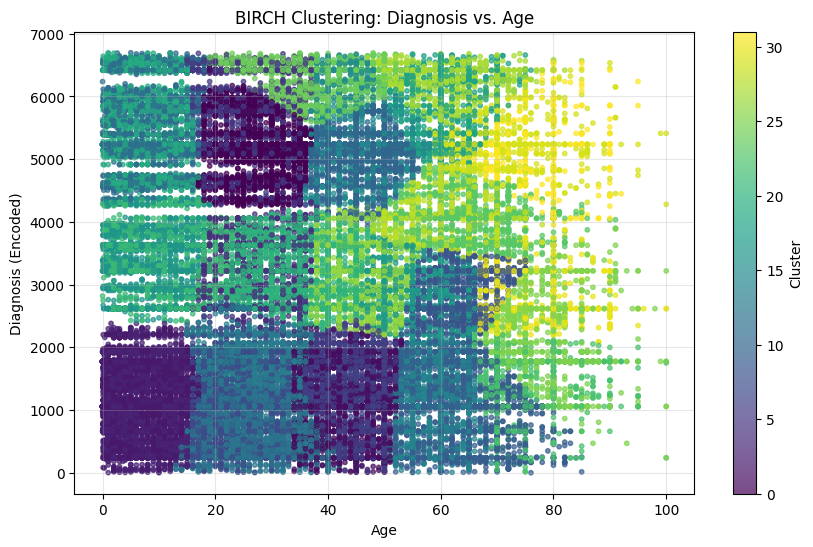

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'respiratory_disease.csv'
data = pd.read_csv(file_path)

# Select relevant columns for clustering
data_subset = data[['diagnosis', 'age', 'gender']]

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
data_subset['diagnosis_encoded'] = label_encoder.fit_transform(data_subset['diagnosis'])

# Prepare the dataset for clustering
clustering_data = data_subset[['diagnosis_encoded', 'age', 'gender']]

# Normalize the data
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Apply BIRCH clustering
birch_model = Birch(threshold=0.5, n_clusters=None)
clusters = birch_model.fit_predict(clustering_data_normalized)

# Add the cluster labels back to the original data
data['cluster'] = clusters
data['diagnosis_encoded'] = label_encoder.fit_transform(data['diagnosis'])
# Save the resulting dataset with clusters
data.to_csv('respiratory_disease_with_clusters.csv', index=False)

# Preview the dataset with cluster labels
print(data[['diagnosis', 'age', 'gender', 'cluster']].head())
# Ensure diagnosis_encoded is added to the main DataFrame


# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['age'],
    data['diagnosis_encoded'],
    c=data['cluster'],
    cmap='viridis',
    s=10,
    alpha=0.7
)

plt.colorbar(scatter, label='Cluster')
plt.title('BIRCH Clustering: Diagnosis vs. Age')
plt.xlabel('Age')
plt.ylabel('Diagnosis (Encoded)')
plt.grid(alpha=0.3)
plt.show()


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('respiratory_disease.csv')

# List of IDs to remove
id_to_remove = [1014000000, 1036000000, 1049000000, 1203729195, 1215484961,
                1217000000, 1260000000, 1270000000, 1294533132, 1299000000,
                1300000000, 1301000000, 1311000000, 1319000000, 1320000000,
                1322000000, 1367000000]

# Remove rows where 'medongoid' is in the list of IDs to remove
df = df[~df['medongoid'].isin(id_to_remove)]

# Save the updated DataFrame back to the CSV file
df.to_csv('respiratory_diseases.csv', index=False)

print("Rows removed successfully and saved to 'respiratory_diseases.csv'.")


Rows removed successfully and saved to 'respiratory_diseases.csv'.


In [9]:
pip install pandas scikit-learn xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.5/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 2.1/124.9 MB 17.0 MB/s eta 0:00:08
   - -------------------------------------- 3.8/124.9 MB 22.3 MB/s eta 0:00:06
   - -------------------------------------- 5.4/124.9 MB 24.7 MB/s eta 0:00:05
   -- ------------------------------------- 7.1/124.9 MB 26.7 MB/s eta 0:00:05
   -- ------------------------------------- 8.9/124.9 MB 28.4 MB/s eta 0:00:05
   --- ------------------------------------ 10.6/124.9 MB 36.3 MB/s eta 0:00:04
   --- ------------------------------------ 12.1/124.9 MB 34.6 MB/s eta 0:00:04
   ---- ---


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load the dataset
data = pd.read_csv('respiratory_disease.csv')

# Encode the target variable (e.g., 'diagnosis') if it's categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['diagnosis_encoded'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Define features (X) and target (y)
X = data_cleaned[['age', 'gender']]  # Add other relevant features if needed
y = data_cleaned['diagnosis_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the XGBoost model: {accuracy:.2f}")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 5798 5799 5800], got [   0    1    2 ... 6694 6697 6698]

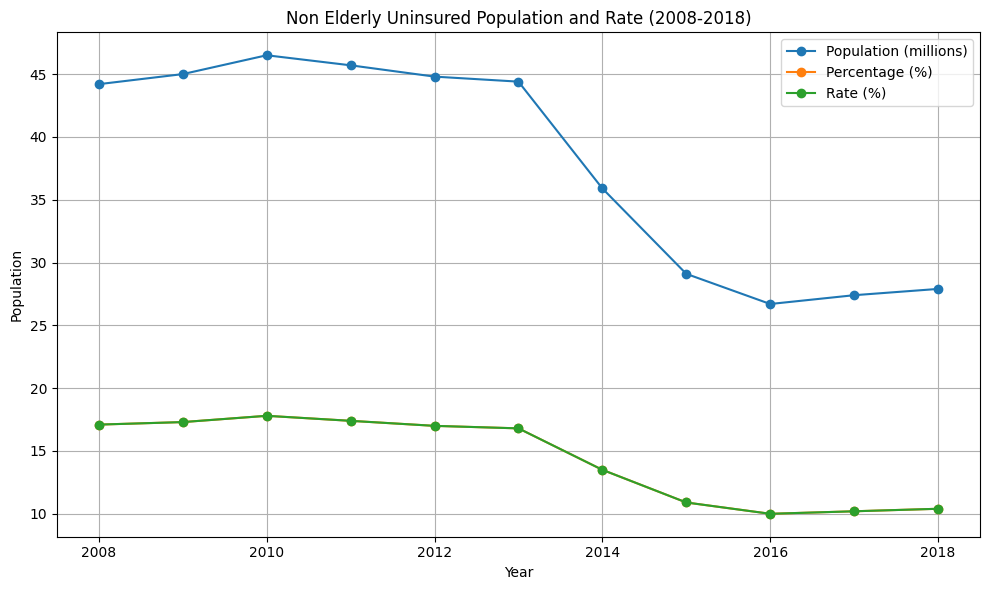

In [3]:
import matplotlib.pyplot as plt

# Data
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
population = [44.2, 45.0, 46.5, 45.7, 44.8, 44.4, 35.9, 29.1, 26.7, 27.4, 27.9]
percentage = [17.1, 17.3, 17.8, 17.4, 17.0, 16.8, 13.5, 10.9, 10.0, 10.2, 10.4]
rate = [17.1, 17.3, 17.8, 17.4, 17.0, 16.8, 13.5, 10.9, 10.0, 10.2, 10.4]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(years, population, label='Population (millions)', marker='o')
plt.plot(years, percentage, label='Percentage (%)', marker='o')
plt.plot(years, rate, label='Rate (%)', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Non Elderly Uninsured Population and Rate (2008-2018)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


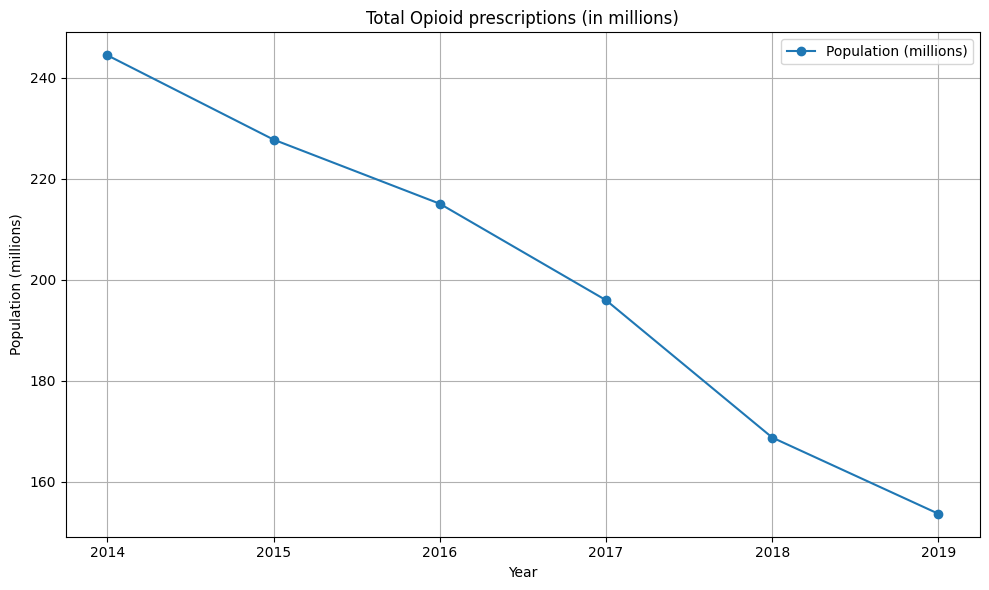

In [4]:
import matplotlib.pyplot as plt

# Data for second dataset
years2 = [2014, 2015, 2016, 2017, 2018, 2019]
population2 = [244.5, 227.8, 215.1, 196.0, 168.8, 153.7]

# Create line plot for second dataset
plt.figure(figsize=(10, 6))
plt.plot(years2, population2, label='Population (millions)', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('Total Opioid prescriptions (in millions)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
